In [10]:
import numpy as np
import scipy.stats as st

#DONNÉES HISTORIQUE 1A

r=0.0433
mu=0.2014662
sigma =0.2247714

#18/11/2024 00:00
S_0 =228.20

K=240

T=1

#Val théorique 

N = st.norm(loc=0, scale=1)

d1 = (np.log(S_0/K)+(r+0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
d2 = d1-sigma*np.sqrt(T)

CALL_THEO = S_0*N.cdf(d1) - K*np.exp(-r*T)*N.cdf(d2)

print(f"La valeur théorique du Call est {CALL_THEO}")




La valeur théorique du Call est 19.688143221568964


In [14]:
n=1000000

Ech =N.rvs(size=n)

Ech_CALL= np.zeros(n)

for i in range (n):
        Ech_CALL[i] = np.exp(-r*T)*max(0, S_0 * (np.exp((r - 0.5 * (sigma**2)) * T + sigma * np.sqrt(T) * Ech[i])) - K)

CALL_MC = np.mean(Ech_CALL)

print(f"La valeur mont carlo  du Call est {CALL_MC}")




La valeur mont carlo  du Call est 19.664149845545513


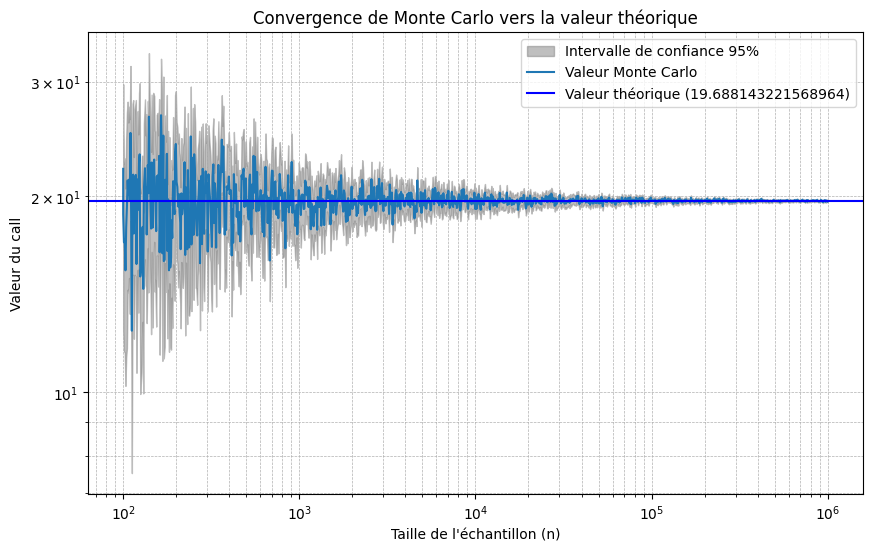

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as N

# Valeurs de n pour la simulation
n_values = np.logspace(2, 6, num=1000, dtype=int)  # 1000 valeurs de n de 1 à 1 million
Valeurs = []
IC_lower = []
IC_upper = []

# Simulation Monte Carlo pour différentes tailles d'échantillon
for n in n_values:
    Ech = np.random.normal(loc=0, scale=1, size=n)
    Ech_CALL =np.exp(-r*T)* np.maximum(0,S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Ech) - K)
    CALL_MC = np.mean(Ech_CALL)
    Valeurs.append(CALL_MC)


    # Calcul des intervalles de confiance à 95%
    std_error = np.sqrt(np.var(Ech_CALL, ddof=1) / n)
    IC_C = [
        CALL_MC - std_error * N.ppf(0.975),
        CALL_MC + std_error * N.ppf(0.975)
    ]
    IC_lower.append(IC_C[0])
    IC_upper.append(IC_C[1])

# Graphique
plt.figure(figsize=(10, 6))
plt.fill_between(n_values, IC_lower, IC_upper, color='gray', alpha=0.5, label="Intervalle de confiance 95%")
plt.loglog(n_values, Valeurs, marker='', label="Valeur Monte Carlo")
plt.axhline(y=CALL_THEO, color='blue', linestyle='-', label=f"Valeur théorique ({CALL_THEO})")
plt.title("Convergence de Monte Carlo vers la valeur théorique")
plt.xlabel("Taille de l'échantillon (n)")
plt.ylabel("Valeur du call")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()


In [16]:
#Control variates method 

n=1000000
Ech = np.random.normal(loc=0, scale=1, size=n)


CALL_MC_OPTI= np.zeros(n)
Call = np.zeros(n)
Call = np.exp(-r*T)* np.maximum(0,S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Ech) - K)
Control_va = S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Ech) - S_0*np.exp(r*T)



COV = np.cov(Call,Control_va)/((S_0**2)*np.exp(r*T)*(np.exp((sigma**2)*T)-1))
Beta = COV[0, 1]
print(Beta)

CALL_MC_OPTI = Call - Beta*Control_va

print(np.mean(CALL_MC_OPTI))



0.5761827992139187
19.70016826505773


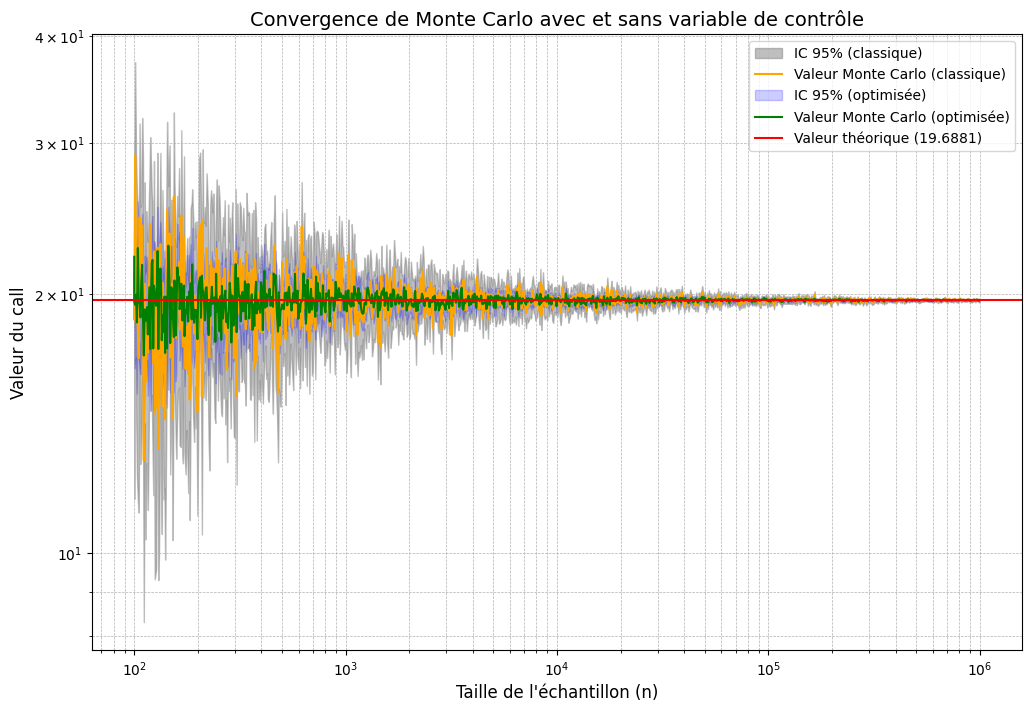

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as N

# Paramètres
r = 0.0433
sigma = 0.2247714
S_0 = 228.20
K = 240
T = 1

# Valeur théorique (Black-Scholes)
d1 = (np.log(S_0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
CALL_THEO = S_0 * N.cdf(d1) - K * np.exp(-r * T) * N.cdf(d2)

# Valeurs de n pour la simulation
n_values = np.logspace(2, 6, num=1000, dtype=int)  # 1000 valeurs de n de 1 à 1 million
Valeurs = []        # Résultats Monte Carlo classique
Valeurs_OPTI = []   # Résultats avec variable de contrôle
IC_lower = []       # Limite inférieure intervalle de confiance (classique)
IC_upper = []       # Limite supérieure intervalle de confiance (classique)
IC_lower_OPTI = []  # Limite inférieure intervalle de confiance (optimisée)
IC_upper_OPTI = []  # Limite supérieure intervalle de confiance (optimisée)

# Simulation Monte Carlo pour différentes tailles d'échantillon
for n in n_values:
    # Génération de l'échantillon
    Ech = np.random.normal(loc=0, scale=1, size=n)
    
    # Monte Carlo classique
    Ech_CALL = np.exp(-r * T) * np.maximum(0, S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Ech) - K)
    CALL_MC = np.mean(Ech_CALL)
    Valeurs.append(CALL_MC)
    
    # Calcul des intervalles de confiance à 95% pour Monte Carlo classique
    std_error = np.sqrt(np.var(Ech_CALL, ddof=1) / n)
    IC_C = [
        CALL_MC - std_error * N.ppf(0.975),
        CALL_MC + std_error * N.ppf(0.975)
    ]
    IC_lower.append(IC_C[0])
    IC_upper.append(IC_C[1])
    
    # Monte Carlo avec variable de contrôle
    Control_va = S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Ech) - S_0 * np.exp(r * T)
    cov_matrix = np.cov(Ech_CALL, Control_va)
    cov_call_control = cov_matrix[0, 1]
    var_control = cov_matrix[1, 1]
    Beta = cov_call_control / var_control
    CALL_MC_OPTI = Ech_CALL - Beta * Control_va
    Valeurs_OPTI.append(np.mean(CALL_MC_OPTI))
    
    # Calcul des intervalles de confiance à 95% pour Monte Carlo optimisé
    std_error_OPTI = np.sqrt(np.var(CALL_MC_OPTI, ddof=1) / n)
    IC_OPTI = [
        np.mean(CALL_MC_OPTI) - std_error_OPTI * N.ppf(0.975),
        np.mean(CALL_MC_OPTI) + std_error_OPTI * N.ppf(0.975)
    ]
    IC_lower_OPTI.append(IC_OPTI[0])
    IC_upper_OPTI.append(IC_OPTI[1])

# Graphique
plt.figure(figsize=(12, 8))

# Monte Carlo classique
plt.fill_between(n_values, IC_lower, IC_upper, color='gray', alpha=0.5, label="IC 95% (classique)")
plt.loglog(n_values, Valeurs, marker='', color='orange', label="Valeur Monte Carlo (classique)")

# Monte Carlo optimisé
plt.fill_between(n_values, IC_lower_OPTI, IC_upper_OPTI, color='blue', alpha=0.2, label="IC 95% (optimisée)")
plt.loglog(n_values, Valeurs_OPTI, marker='', color='green', label="Valeur Monte Carlo (optimisée)")

# Valeur théorique
plt.axhline(y=CALL_THEO, color='red', linestyle='-', label=f"Valeur théorique ({CALL_THEO:.4f})")

# Personnalisation du graphique
plt.title("Convergence de Monte Carlo avec et sans variable de contrôle", fontsize=14)
plt.xlabel("Taille de l'échantillon (n)", fontsize=12)
plt.ylabel("Valeur du call", fontsize=12)
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.xscale("log")
plt.yscale("log")
plt.show()


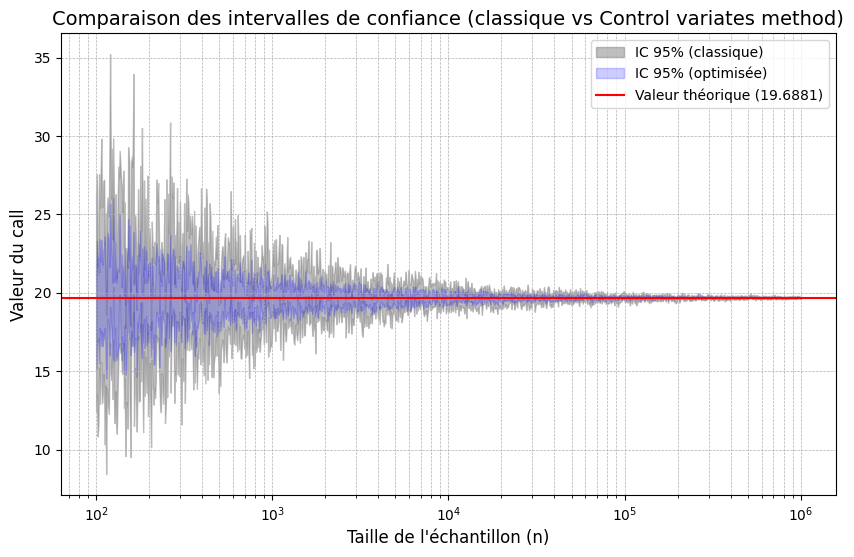

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as N

# Paramètres
r = 0.0433
sigma = 0.2247714
S_0 = 228.20
K = 240
T = 1

# Valeur théorique (Black-Scholes)
d1 = (np.log(S_0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
CALL_THEO = S_0 * N.cdf(d1) - K * np.exp(-r * T) * N.cdf(d2)

# Valeurs de n pour la simulation
n_values = np.logspace(2, 6, num=1000, dtype=int)  # 1000 valeurs de n de 1 à 1 million
IC_lower = []       # Limite inférieure intervalle de confiance (classique)
IC_upper = []       # Limite supérieure intervalle de confiance (classique)
IC_lower_OPTI = []  # Limite inférieure intervalle de confiance (optimisée)
IC_upper_OPTI = []  # Limite supérieure intervalle de confiance (optimisée)

# Simulation Monte Carlo pour différentes tailles d'échantillon
for n in n_values:
    # Génération de l'échantillon
    Ech = np.random.normal(loc=0, scale=1, size=n)
    
    # Monte Carlo classique
    Ech_CALL = np.exp(-r * T) * np.maximum(0, S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Ech) - K)
    std_error = np.sqrt(np.var(Ech_CALL, ddof=1) / n)
    IC_C = [
        np.mean(Ech_CALL) - std_error * N.ppf(0.975),
        np.mean(Ech_CALL) + std_error * N.ppf(0.975)
    ]
    IC_lower.append(IC_C[0])
    IC_upper.append(IC_C[1])
    
    # Monte Carlo avec variable de contrôle
    Control_va = S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Ech) - S_0 * np.exp(r * T)
    cov_matrix = np.cov(Ech_CALL, Control_va)
    cov_call_control = cov_matrix[0, 1]
    var_control = cov_matrix[1, 1]
    Beta = cov_call_control / var_control
    CALL_MC_OPTI = Ech_CALL - Beta * Control_va
    std_error_OPTI = np.sqrt(np.var(CALL_MC_OPTI, ddof=1) / n)
    IC_OPTI = [
        np.mean(CALL_MC_OPTI) - std_error_OPTI * N.ppf(0.975),
        np.mean(CALL_MC_OPTI) + std_error_OPTI * N.ppf(0.975)
    ]
    IC_lower_OPTI.append(IC_OPTI[0])
    IC_upper_OPTI.append(IC_OPTI[1])

# Graphique des intervalles de confiance
plt.figure(figsize=(10, 6))

# Intervalles de confiance
plt.fill_between(n_values, IC_lower, IC_upper, color='gray', alpha=0.5, label="IC 95% (classique)")
plt.fill_between(n_values, IC_lower_OPTI, IC_upper_OPTI, color='blue', alpha=0.2, label="IC 95% (optimisée)")

# Valeur théorique
plt.axhline(y=CALL_THEO, color='red', linestyle='-', label=f"Valeur théorique ({CALL_THEO:.4f})")

# Personnalisation
plt.title("Comparaison des intervalles de confiance (classique vs Control variates method)", fontsize=14)
plt.xlabel("Taille de l'échantillon (n)", fontsize=12)
plt.ylabel("Valeur du call", fontsize=12)
plt.xscale("log")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()



In [2]:
# Stockage des rapports des variances
variance_ratios = []

for n in n_values:
    # Génération de l'échantillon
    Ech = np.random.normal(loc=0, scale=1, size=n)
    
    # Monte Carlo classique
    Ech_CALL = np.exp(-r * T) * np.maximum(0, S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Ech) - K)
    var_classic = np.var(Ech_CALL, ddof=1)
    
    # Monte Carlo avec variable de contrôle
    Control_va = S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Ech) - S_0 * np.exp(r * T)
    cov_matrix = np.cov(Ech_CALL, Control_va)
    cov_call_control = cov_matrix[0, 1]
    var_control = cov_matrix[1, 1]
    Beta = cov_call_control / var_control
    CALL_MC_OPTI = Ech_CALL - Beta * Control_va
    var_opti = np.var(CALL_MC_OPTI, ddof=1)
    
    # Calcul et stockage du rapport de variance
    variance_ratios.append(var_classic / var_opti)

# Calcul du rapport moyen des variances
mean_variance_ratio = np.mean(variance_ratios)

# Affichage du résultat
print(f"Rapport moyen des variances (classique/optimisée) : {mean_variance_ratio:.4f}")


Rapport moyen des variances (classique/optimisée) : 4.7810


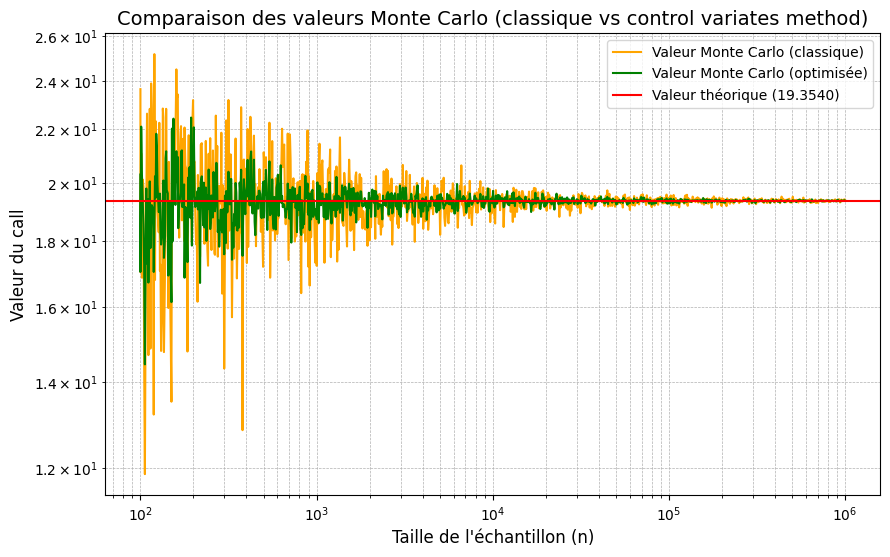

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as N

# Paramètres
r = 0.0433
sigma = 0.2247714
S_0 = 228.20
K = 240
T = 1

# Valeur théorique (Black-Scholes)
d1 = (np.log(S_0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
CALL_THEO = S_0 * N.cdf(d1) - K * np.exp(-r * T) * N.cdf(d2)

# Valeurs de n pour la simulation
n_values = np.logspace(2, 6, num=1000, dtype=int)  # 1000 valeurs de n de 1 à 1 million
Valeurs = []        # Résultats Monte Carlo classique
Valeurs_OPTI = []   # Résultats avec variable de contrôle

# Simulation Monte Carlo pour différentes tailles d'échantillon
for n in n_values:
    # Génération de l'échantillon
    Ech = np.random.normal(loc=0, scale=1, size=n)
    
    # Monte Carlo classique
    Ech_CALL = np.exp(-r * T) * np.maximum(0, S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Ech) - K)
    CALL_MC = np.mean(Ech_CALL)
    Valeurs.append(CALL_MC)
    
    # Monte Carlo avec variable de contrôle
    Control_va = S_0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Ech) - S_0 * np.exp(r * T)
    cov_matrix = np.cov(Ech_CALL, Control_va)
    cov_call_control = cov_matrix[0, 1]
    var_control = cov_matrix[1, 1]
    Beta = cov_call_control / var_control
    CALL_MC_OPTI = Ech_CALL - Beta * Control_va
    Valeurs_OPTI.append(np.mean(CALL_MC_OPTI))

# Graphique des valeurs Monte Carlo
plt.figure(figsize=(10, 6))

# Valeurs Monte Carlo
plt.loglog(n_values, Valeurs, color='orange', label="Valeur Monte Carlo (classique)")
plt.loglog(n_values, Valeurs_OPTI, color='green', label="Valeur Monte Carlo (optimisée)")

# Valeur théorique
plt.axhline(y=CALL_THEO, color='red', linestyle='-', label=f"Valeur théorique ({CALL_THEO:.4f})")

# Personnalisation
plt.title("Comparaison des valeurs Monte Carlo (classique vs control variates method)", fontsize=14)
plt.xlabel("Taille de l'échantillon (n)", fontsize=12)
plt.ylabel("Valeur du call", fontsize=12)
plt.xscale("log")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()


/var/folders/4z/xxm11rrn72q_d9xzmfy5ss9w0000gn/T/ipykernel_1138/3789796379.py:36: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  mu_star = optimize.fmin(lambda x: arg_min(x), nudt2, disp=True)


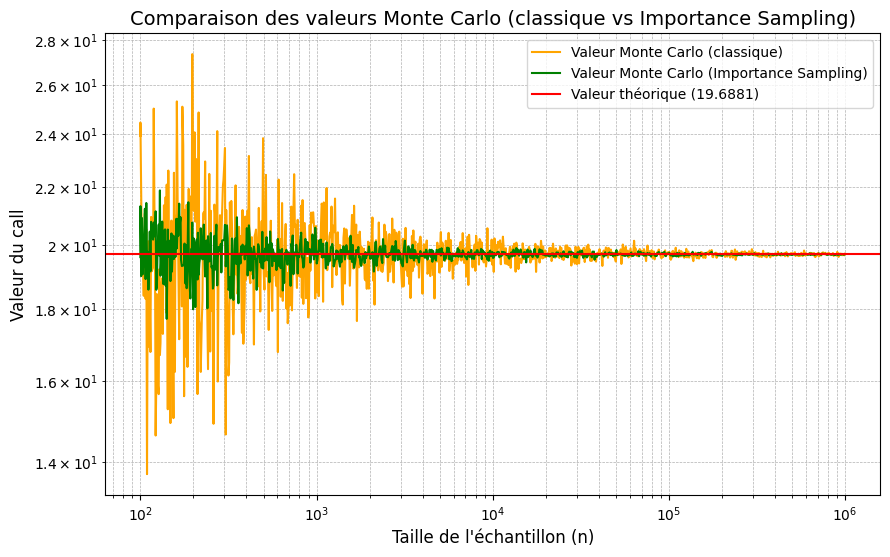

In [1]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
import matplotlib.pyplot as plt

# Paramètres
r = 0.0433
mu = 0.2014662
vol = 0.2247714
S_0 = 228.20
K = 240
T = 1

dt = T
nudt = (r - 0.5 * vol**2) * dt
nudt2 = (np.log(K / S_0) - 0.5 * vol**2) * dt
volsdt = vol * np.sqrt(dt)

# Prix théorique Black-Scholes
d1 = (np.log(S_0 / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)
CALL_THEO = S_0 * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)

# Importance Sampling
p = stats.norm(nudt, volsdt)
q = lambda mu: stats.norm(mu, volsdt)
z_T = lambda x, mu, sig: mu + sig * x
f_0 = lambda z: np.exp(-r * T) * np.maximum(0, S_0 * np.exp(z) - K)
M = 1000000

def arg_min(x):
    x_T = np.random.normal(0, 1, M)
    z = z_T(x_T, nudt, volsdt)
    return np.mean(f_0(z) ** 2 * p.pdf(z) / q(x).pdf(z))

mu_star = optimize.fmin(lambda x: arg_min(x), nudt2, disp=True)
mu_star = mu_star[0]

# Simulation avec Importance Sampling
n_values = np.logspace(2, 6, num=1000, dtype=int)  # 1000 valeurs de n de 1 à 1 million
Valeurs_is = []  # Résultats Importance Sampling
Valeurs_mc = []  # Résultats Monte Carlo classique

for n in n_values:
    # Simulation avec Importance Sampling
    x_is = np.random.randn(n)
    z_is = z_T(x_is, mu_star, volsdt)
    CT_is = f_0(z_is) * p.pdf(z_is) / q(mu_star).pdf(z_is)
    CALL_is = np.mean(CT_is)
    Valeurs_is.append(CALL_is)

    # Simulation Monte Carlo classique
    x_mc = np.random.randn(n)
    z_mc = z_T(x_mc, nudt, volsdt)
    CT_mc = f_0(z_mc)
    CALL_mc = np.mean(CT_mc)
    Valeurs_mc.append(CALL_mc)

# Graphique des valeurs Monte Carlo
plt.figure(figsize=(10, 6))

# Valeurs Monte Carlo
plt.loglog(n_values, Valeurs_mc, color='orange', label="Valeur Monte Carlo (classique)")
plt.loglog(n_values, Valeurs_is, color='green', label="Valeur Monte Carlo (Importance Sampling)")

# Valeur théorique
plt.axhline(y=CALL_THEO, color='red', linestyle='-', label=f"Valeur théorique ({CALL_THEO:.4f})")

# Personnalisation
plt.title("Comparaison des valeurs Monte Carlo (classique vs Importance Sampling)", fontsize=14)
plt.xlabel("Taille de l'échantillon (n)", fontsize=12)
plt.ylabel("Valeur du call", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()


In [2]:
# Stockage des variances
Variances_is = []  # Variances Importance Sampling
Variances_mc = []  # Variances Monte Carlo classique

for n in n_values:
    # Simulation avec Importance Sampling
    x_is = np.random.randn(n)
    z_is = z_T(x_is, mu_star, volsdt)
    CT_is = f_0(z_is) * p.pdf(z_is) / q(mu_star).pdf(z_is)
    CALL_is = np.mean(CT_is)
    Variance_is = np.var(CT_is) / n
    Valeurs_is.append(CALL_is)
    Variances_is.append(Variance_is)

    # Simulation Monte Carlo classique
    x_mc = np.random.randn(n)
    z_mc = z_T(x_mc, nudt, volsdt)
    CT_mc = f_0(z_mc)
    CALL_mc = np.mean(CT_mc)
    Variance_mc = np.var(CT_mc) / n
    Valeurs_mc.append(CALL_mc)
    Variances_mc.append(Variance_mc)

# Calcul de la réduction moyenne de variance
variance_reductions = np.array(Variances_mc) / np.array(Variances_is)
reduction_moyenne = np.mean(variance_reductions)

print(f"Réduction moyenne de la variance (Monte Carlo classique vs Importance Sampling) : {reduction_moyenne:.2f}")


Réduction moyenne de la variance (Monte Carlo classique vs Importance Sampling) : 10.82


/var/folders/4z/xxm11rrn72q_d9xzmfy5ss9w0000gn/T/ipykernel_1345/3593659678.py:38: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  mu_star = optimize.fmin(lambda x: arg_min(x), nudt2, disp=True)


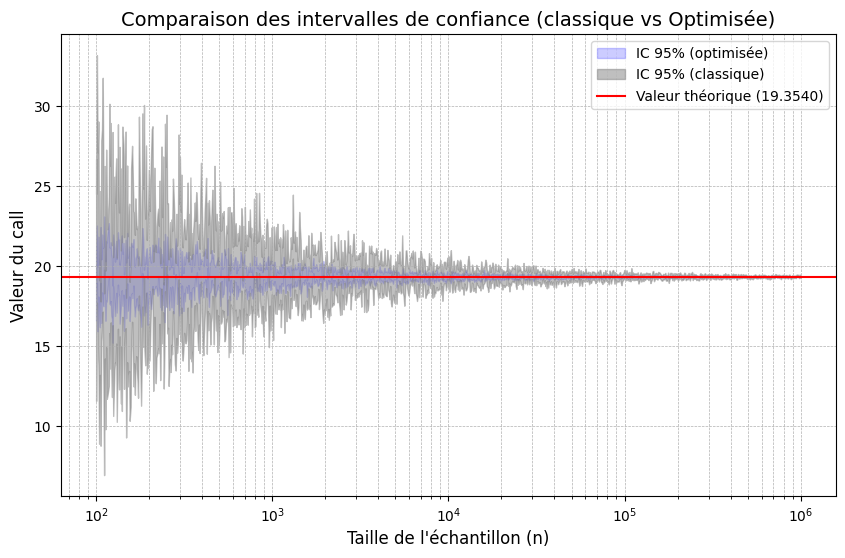

In [104]:
#IMPORTANCE SAMPLING IC

import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
import matplotlib.pyplot as plt

# Paramètres
r = 0.0433
mu = 0.2014662
vol = 0.2247714
S_0 = 228.20
K = 240
T = 1

dt = T
nudt = (r - 0.5 * vol**2) * dt
nudt2 = (np.log(K / S_0) - 0.5 * vol**2) * dt
volsdt = vol * np.sqrt(dt)

# Prix théorique Black-Scholes
d1 = (np.log(S_0 / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)
CALL_THEO = S_0 * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)

# Importance Sampling
p = stats.norm(nudt, volsdt)
q = lambda mu: stats.norm(mu, volsdt)
z_T = lambda x, mu, sig: mu + sig * x
f_0 = lambda z: np.exp(-r * T) * np.maximum(0, S_0 * np.exp(z) - K)
M = 1000000

def arg_min(x):
    x_T = np.random.normal(0, 1, M)
    z = z_T(x_T, nudt, volsdt)
    return np.mean(f_0(z) ** 2 * p.pdf(z) / q(x).pdf(z))

mu_star = optimize.fmin(lambda x: arg_min(x), nudt2, disp=True)
mu_star = mu_star[0]

# Simulation avec Importance Sampling
n_values = np.logspace(2, 6, num=1000, dtype=int)  # 1000 valeurs de n de 1 à 1 million
IC_is_lower = []  # Bornes inférieures des IC Importance Sampling
IC_is_upper = []  # Bornes supérieures des IC Importance Sampling
IC_mc_lower = []  # Bornes inférieures des IC Monte Carlo classique
IC_mc_upper = []  # Bornes supérieures des IC Monte Carlo classique
Valeurs_is = []  # Résultats Importance Sampling
Valeurs_mc = []  # Résultats Monte Carlo classique

for n in n_values:
    # Simulation avec Importance Sampling
    x_is = np.random.randn(n)
    z_is = z_T(x_is, mu_star, volsdt)
    CT_is = f_0(z_is) * p.pdf(z_is) / q(mu_star).pdf(z_is)
    CALL_is = np.mean(CT_is)
    Valeurs_is.append(CALL_is)
    
    # Calcul des intervalles de confiance pour Importance Sampling
    sigma_is = np.std(CT_is)
    SE_is = sigma_is / np.sqrt(n)
    IC_is_lower.append(CALL_is - 1.96 * SE_is)
    IC_is_upper.append(CALL_is + 1.96 * SE_is)

    # Simulation Monte Carlo classique
    x_mc = np.random.randn(n)
    z_mc = z_T(x_mc, nudt, volsdt)
    CT_mc = f_0(z_mc)
    CALL_mc = np.mean(CT_mc)
    Valeurs_mc.append(CALL_mc)
    
    # Calcul des intervalles de confiance pour Monte Carlo classique
    sigma_mc = np.std(CT_mc)
    SE_mc = sigma_mc / np.sqrt(n)
    IC_mc_lower.append(CALL_mc - 1.96 * SE_mc)
    IC_mc_upper.append(CALL_mc + 1.96 * SE_mc)

# Graphique des intervalles de confiance
plt.figure(figsize=(10, 6))

# Intervalles de confiance Importance Sampling (optimisée)
plt.fill_between(n_values, IC_is_lower, IC_is_upper, color='blue', alpha=0.2, label="IC 95% (optimisée)")

# Intervalles de confiance Monte Carlo classique
plt.fill_between(n_values, IC_mc_lower, IC_mc_upper, color='gray', alpha=0.5, label="IC 95% (classique)")

# Valeur théorique
plt.axhline(y=CALL_THEO, color='red', linestyle='-', label=f"Valeur théorique ({CALL_THEO:.4f})")

# Personnalisation
plt.title("Comparaison des intervalles de confiance (classique vs Optimisée)", fontsize=14)
plt.xlabel("Taille de l'échantillon (n)", fontsize=12)
plt.ylabel("Valeur du call", fontsize=12)
plt.xscale("log")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()


/var/folders/4z/xxm11rrn72q_d9xzmfy5ss9w0000gn/T/ipykernel_5093/2005301045.py:37: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  mu_star = optimize.fmin(lambda x: arg_min(x), nudt2, disp=True)


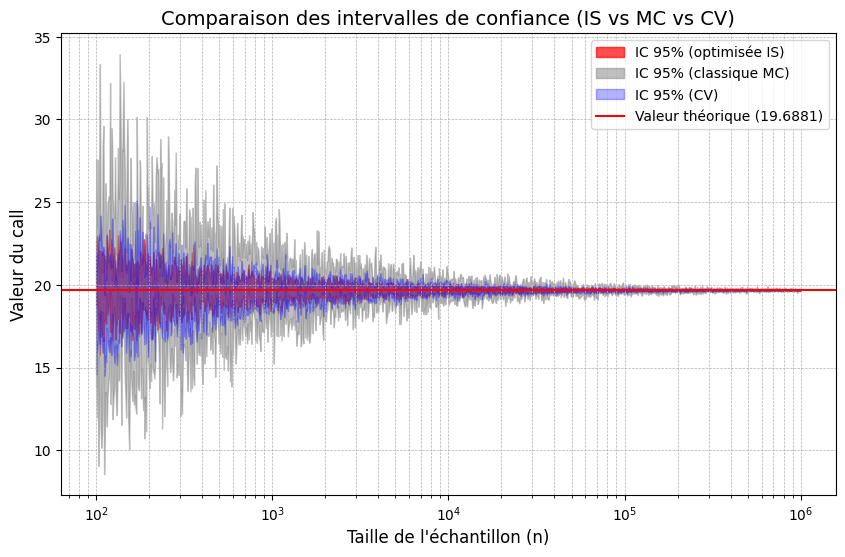

In [20]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
import matplotlib.pyplot as plt
from scipy.stats import norm as N

# Paramètres
r = 0.0433
mu = 0.2014662
vol = 0.2247714
S_0 = 228.20
K = 240
T = 1

dt = T
nudt = (r - 0.5 * vol**2) * dt
nudt2 = (np.log(K / S_0) - 0.5 * vol**2) * dt
volsdt = vol * np.sqrt(dt)

# Prix théorique Black-Scholes
d1 = (np.log(S_0 / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)
CALL_THEO = S_0 * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)

# Importance Sampling
p = stats.norm(nudt, volsdt)
q = lambda mu: stats.norm(mu, volsdt)
z_T = lambda x, mu, sig: mu + sig * x
f_0 = lambda z: np.exp(-r * T) * np.maximum(0, S_0 * np.exp(z) - K)
M = 1000000

def arg_min(x):
    x_T = np.random.normal(0, 1, M)
    z = z_T(x_T, nudt, volsdt)
    return np.mean(f_0(z) ** 2 * p.pdf(z) / q(x).pdf(z))

mu_star = optimize.fmin(lambda x: arg_min(x), nudt2, disp=True)
mu_star = mu_star[0]

# Simulation avec Importance Sampling
n_values = np.logspace(2, 6, num=1000, dtype=int)  # 1000 valeurs de n de 1 à 1 million
IC_is_lower = []  # Bornes inférieures des IC Importance Sampling
IC_is_upper = []  # Bornes supérieures des IC Importance Sampling
IC_mc_lower = []  # Bornes inférieures des IC Monte Carlo classique
IC_mc_upper = []  # Bornes supérieures des IC Monte Carlo classique
IC_cv_lower = []  # Bornes inférieures des IC Control Variates
IC_cv_upper = []  # Bornes supérieures des IC Control Variates
Valeurs_is = []  # Résultats Importance Sampling
Valeurs_mc = []  # Résultats Monte Carlo classique
Valeurs_cv = []  # Résultats Control Variates

for n in n_values:
    # Simulation avec Importance Sampling
    x_is = np.random.randn(n)
    z_is = z_T(x_is, mu_star, volsdt)
    CT_is = f_0(z_is) * p.pdf(z_is) / q(mu_star).pdf(z_is)
    CALL_is = np.mean(CT_is)
    Valeurs_is.append(CALL_is)
    
    # Calcul des intervalles de confiance pour Importance Sampling
    sigma_is = np.std(CT_is)
    SE_is = sigma_is / np.sqrt(n)
    IC_is_lower.append(CALL_is - 1.96 * SE_is)
    IC_is_upper.append(CALL_is + 1.96 * SE_is)

    # Simulation Monte Carlo classique
    x_mc = np.random.randn(n)
    z_mc = z_T(x_mc, nudt, volsdt)
    CT_mc = f_0(z_mc)
    CALL_mc = np.mean(CT_mc)
    Valeurs_mc.append(CALL_mc)
    
    # Calcul des intervalles de confiance pour Monte Carlo classique
    sigma_mc = np.std(CT_mc)
    SE_mc = sigma_mc / np.sqrt(n)
    IC_mc_lower.append(CALL_mc - 1.96 * SE_mc)
    IC_mc_upper.append(CALL_mc + 1.96 * SE_mc)

    # Simulation Monte Carlo avec contrôle de variées
    Control_va = S_0 * np.exp((r - 0.5 * vol**2) * T + vol * np.sqrt(T) * x_mc) - S_0 * np.exp(r * T)
    cov_matrix = np.cov(CT_mc, Control_va)
    cov_call_control = cov_matrix[0, 1]
    var_control = cov_matrix[1, 1]
    Beta = cov_call_control / var_control
    CT_cv = CT_mc - Beta * Control_va
    CALL_cv = np.mean(CT_cv)
    Valeurs_cv.append(CALL_cv)

    # Calcul des intervalles de confiance pour Control Variates
    sigma_cv = np.std(CT_cv)
    SE_cv = sigma_cv / np.sqrt(n)
    IC_cv_lower.append(CALL_cv - 1.96 * SE_cv)
    IC_cv_upper.append(CALL_cv + 1.96 * SE_cv)

# Graphique des intervalles de confiance
plt.figure(figsize=(10, 6))

# Intervalles de confiance Importance Sampling (optimisée)
plt.fill_between(n_values, IC_is_lower, IC_is_upper, color='red', alpha=0.7, label="IC 95% (optimisée IS)")

# Intervalles de confiance Monte Carlo classique
plt.fill_between(n_values, IC_mc_lower, IC_mc_upper, color='gray', alpha=0.5, label="IC 95% (classique MC)")

# Intervalles de confiance Control Variates
plt.fill_between(n_values, IC_cv_lower, IC_cv_upper, color='blue', alpha=0.3, label="IC 95% (CV)")

# Valeur théorique
plt.axhline(y=CALL_THEO, color='red', linestyle='-', label=f"Valeur théorique ({CALL_THEO:.4f})")

# Personnalisation
plt.title("Comparaison des intervalles de confiance (IS vs MC vs CV)", fontsize=14)
plt.xlabel("Taille de l'échantillon (n)", fontsize=12)
plt.ylabel("Valeur du call", fontsize=12)
plt.xscale("log")
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.show()


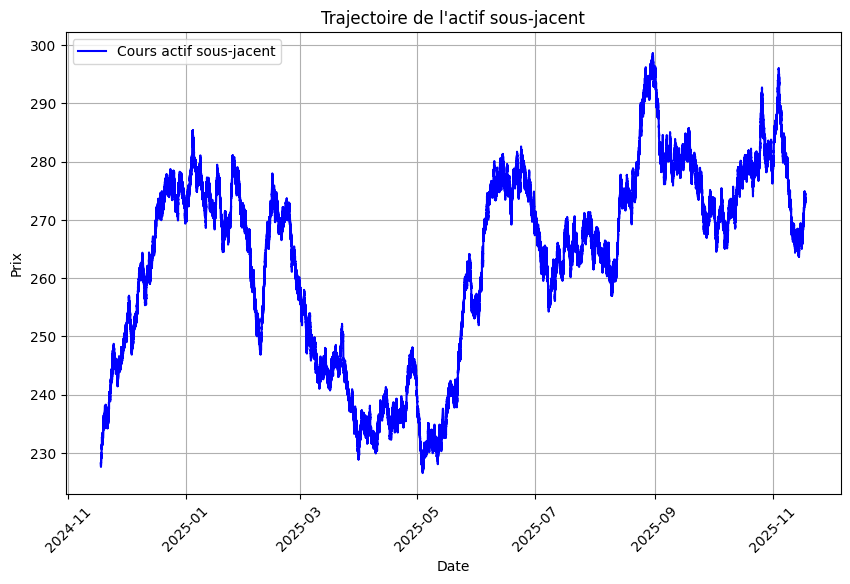

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Option Lockback 
sigma = 0.2247714
S_0 = 228.20
K = 240
T = 1
r = 0.0433
mu = 0.2014662

# Paramètres
n = 2520000  # Réduction du nombre de points pour une visualisation plus claire
h = T / n

# Génération des incréments
increment = np.random.normal(0, 1, n) * np.sqrt(h)

# Initialisation de la trajectoire
trajectoire = np.zeros(n + 1)

# Temps
t = np.linspace(0, T, n + 1)

# Calcul de la trajectoire du mouvement brownien
for i in range(n):
    trajectoire[i + 1] = trajectoire[i] + increment[i]

# Calcul de la trajectoire de l'actif sous-jacent
sj_P = np.zeros(n + 1)
sj_P[0] = S_0
for i in range(n):
    sj_P[i + 1] = S_0 * np.exp((mu - 0.5 * sigma**2) * t[i + 1] + sigma * trajectoire[i + 1])

# Tracé de la trajectoire de l'actif
plt.figure(figsize=(10, 6))

# Date de départ
start_date = datetime(2024, 11, 18)

# Génération des dates en fonction des pas de temps
dates = [start_date + timedelta(days=i) for i in np.linspace(0, 365, n + 1)]  # dates sur 365 jours

plt.plot(dates, sj_P, label="Cours actif sous-jacent", color='blue')
plt.title("Trajectoire de l'actif sous-jacent")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.legend()
plt.show()


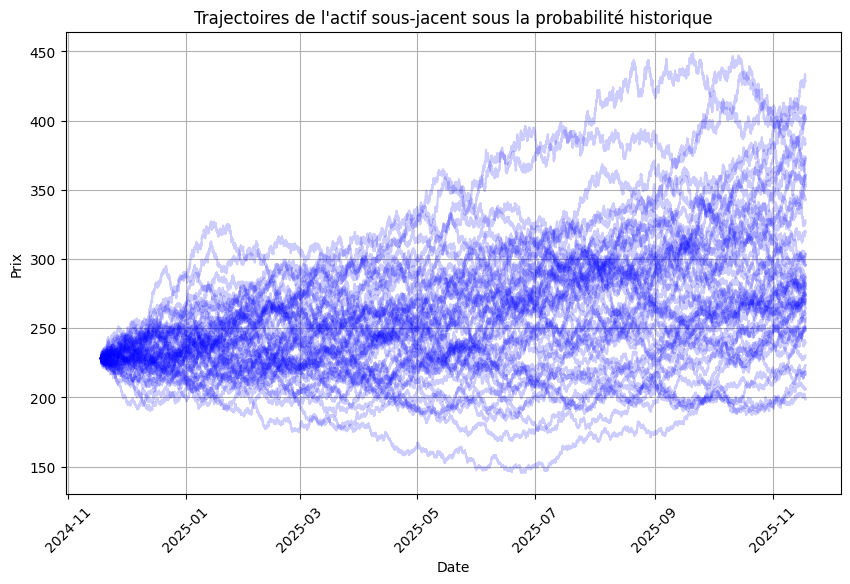

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Option Lockback 
sigma = 0.2247714
S_0 = 228.20
K = 240
T = 1
r = 0.04
mu = 0.2014662

# Paramètres
n = 25200  # Réduction du nombre de points pour une visualisation plus claire
h = T / n
num_trajectories = 50  # Nombre de trajectoires à afficher

# Date de départ
start_date = datetime(2024, 11, 18)

# Tracé de la trajectoire de l'actif
plt.figure(figsize=(10, 6))

# Génération des dates en fonction des pas de temps
dates = [start_date + timedelta(days=i) for i in np.linspace(0, 365, n + 1)]  # dates sur 365 jours

# Tracer plusieurs trajectoires
for _ in range(num_trajectories):
    # Génération des incréments pour une trajectoire
    increment = np.random.normal(0, 1, n) * np.sqrt(h)

    # Initialisation de la trajectoire
    trajectoire = np.zeros(n + 1)

    # Calcul de la trajectoire du mouvement brownien
    for i in range(n):
        trajectoire[i + 1] = trajectoire[i] + increment[i]

    # Calcul de la trajectoire de l'actif sous-jacent
    sj_P = np.zeros(n + 1)
    sj_P[0] = S_0
    for i in range(n):
        sj_P[i + 1] = S_0 * np.exp((mu - 0.5 * sigma**2) * t[i + 1] + sigma * trajectoire[i + 1])

    # Affichage de la trajectoire
    plt.plot(dates, sj_P, color='blue', alpha=0.2)  # alpha pour rendre les courbes semi-transparentes

plt.title("Trajectoires de l'actif sous-jacent sous la probabilité historique")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.show()


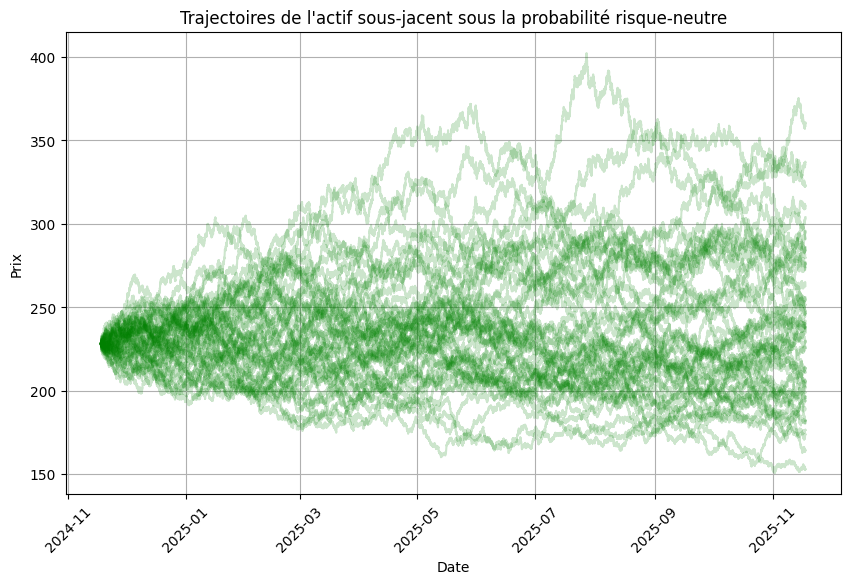

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Option Lockback 
sigma = 0.2247714
S_0 = 228.20
K = 240
T = 1
r = 0.0433
mu = 0.2014662

# Paramètres
n = 25200  # Réduction du nombre de points pour une visualisation plus claire
h = T / n
num_trajectories = 50  # Nombre de trajectoires à afficher

# Date de départ
start_date = datetime(2024, 11, 18)

# Tracé de la trajectoire de l'actif
plt.figure(figsize=(10, 6))

# Génération des dates en fonction des pas de temps
dates = [start_date + timedelta(days=i) for i in np.linspace(0, 365, n + 1)]  # dates sur 365 jours

# Tracer plusieurs trajectoires
for _ in range(num_trajectories):
    # Génération des incréments pour une trajectoire
    increment = np.random.normal(0, 1, n) * np.sqrt(h)

    # Initialisation de la trajectoire
    trajectoire = np.zeros(n + 1)

    # Calcul de la trajectoire du mouvement brownien
    for i in range(n):
        trajectoire[i + 1] = trajectoire[i] + increment[i]

    # Calcul de la trajectoire de l'actif sous-jacent
    sj_P = np.zeros(n + 1)
    sj_P[0] = S_0
    for i in range(n):
        sj_P[i + 1] = S_0 * np.exp((r - 0.5 * sigma**2) * t[i + 1] + sigma * trajectoire[i + 1])

    # Affichage de la trajectoire
    plt.plot(dates, sj_P, color='green', alpha=0.2)  # alpha pour rendre les courbes semi-transparentes

plt.title("Trajectoires de l'actif sous-jacent sous la probabilité risque-neutre")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Option Lockback 
sigma = 0.2247714
S_0 = 228.20
K = 1.3
T = 1
r = 0.0433
mu = 0.2014662

# Paramètres
n = 25200  # Réduction du nombre de points pour une visualisation plus claire
h = T / n
num_trajectories = 25000  # Nombre de trajectoires à afficher
terminal_values = []
minimal_values = []

t = np.linspace(0, T, n + 1)

# Date de départ
start_date = datetime(2024, 11, 18)

# Tracé de la trajectoire de l'actif
plt.figure(figsize=(10, 6))

# Génération des dates en fonction des pas de temps
dates = [start_date + timedelta(days=i) for i in np.linspace(0, 365, n + 1)]  # dates sur 365 jours

# Tracer plusieurs trajectoires
for _ in range(num_trajectories):
    # Génération des incréments pour une trajectoire
    increment = np.random.normal(0, 1, n) * np.sqrt(h)

    # Initialisation de la trajectoire
    trajectoire = np.zeros(n + 1)

    # Calcul de la trajectoire du mouvement brownien
    for i in range(n):
        trajectoire[i + 1] = trajectoire[i] + increment[i]

    # Calcul de la trajectoire de l'actif sous-jacent
    sj_P = np.zeros(n + 1)
    sj_P[0] = S_0
    for i in range(n):
        sj_P[i + 1] = S_0 * np.exp((r - 0.5 * sigma**2) * t[i + 1] + sigma * trajectoire[i + 1])
    terminal_values.append(sj_P[-1])
    minimal_values.append(min(sj_P))

terminal_values = np.array(terminal_values)
minimal_values = np.array(minimal_values)


Clk_t= np.zeros(num_trajectories)
for i in range(num_trajectories):
    Clk_t[i] = max(0,(terminal_values[i]-K*minimal_values[i]))

prix = np.exp(-r)*np.mean(Clk_t)

print(prix)



8.583343345416752


<Figure size 1000x600 with 0 Axes>

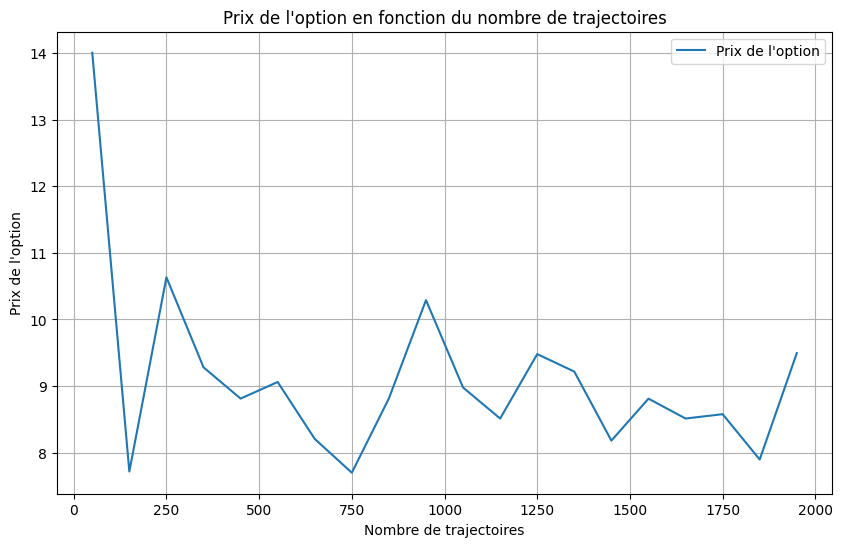

Prix pour 50 trajectoires : 14.0031
Prix pour 150 trajectoires : 7.7161
Prix pour 250 trajectoires : 10.6321
Prix pour 350 trajectoires : 9.2808
Prix pour 450 trajectoires : 8.8109
Prix pour 550 trajectoires : 9.0602
Prix pour 650 trajectoires : 8.2057
Prix pour 750 trajectoires : 7.6982
Prix pour 850 trajectoires : 8.8136
Prix pour 950 trajectoires : 10.2896
Prix pour 1050 trajectoires : 8.9774
Prix pour 1150 trajectoires : 8.5115
Prix pour 1250 trajectoires : 9.4790
Prix pour 1350 trajectoires : 9.2163
Prix pour 1450 trajectoires : 8.1801
Prix pour 1550 trajectoires : 8.8099
Prix pour 1650 trajectoires : 8.5118
Prix pour 1750 trajectoires : 8.5770
Prix pour 1850 trajectoires : 7.8966
Prix pour 1950 trajectoires : 9.4939


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Option Lockback
sigma = 0.2247714
S_0 = 228.20
K = 1.3
T = 1
r = 0.0433

# Paramètres
n = 25200  # Nombre de pas pour la trajectoire (temps continu)
h = T / n  # Pas de temps

# Date de départ
start_date = datetime(2024, 11, 18)

# Tracé de la trajectoire de l'actif
plt.figure(figsize=(10, 6))

# Génération des dates en fonction des pas de temps
dates = [start_date + timedelta(days=i) for i in np.linspace(0, 365, n + 1)]  # dates sur 365 jours

# Liste pour stocker les prix en fonction du nombre de trajectoires
prices = []

# Itération sur différentes valeurs de num_trajectories
for num_trajectories in range(50, 2000, 100):  # De 50 à 10,000 trajectoires par pas de 50
    terminal_values = []
    minimal_values = []
    
    # Tracer plusieurs trajectoires
    for _ in range(num_trajectories):
        # Génération des incréments pour une trajectoire
        increment = np.random.normal(0, 1, n) * np.sqrt(h)

        # Initialisation de la trajectoire
        trajectoire = np.zeros(n + 1)

        # Calcul de la trajectoire du mouvement brownien
        for i in range(n):
            trajectoire[i + 1] = trajectoire[i] + increment[i]

        # Calcul de la trajectoire de l'actif sous-jacent
        sj_P = np.zeros(n + 1)
        sj_P[0] = S_0
        for i in range(n):
            sj_P[i + 1] = S_0 * np.exp((r - 0.5 * sigma**2) * (i + 1) * h + sigma * trajectoire[i + 1])
        
        terminal_values.append(sj_P[-1])
        minimal_values.append(min(sj_P))

    terminal_values = np.array(terminal_values)
    minimal_values = np.array(minimal_values)

    # Calcul du payoff
    Clk_t = np.maximum(0, terminal_values - K * minimal_values)
    prix = np.exp(-r) * np.mean(Clk_t)
    
    prices.append(prix)

 # Affichage des résultats
plt.plot(range(50, 2000, 100), prices, label='Prix de l\'option')  # Plage ajustée
plt.xlabel('Nombre de trajectoires')
plt.ylabel('Prix de l\'option')
plt.title('Prix de l\'option en fonction du nombre de trajectoires')
plt.grid(True)
plt.legend()
plt.show()

# Affichage des prix pour différentes trajectoires
for num_trajectories, prix in zip(range(50, 2000, 100), prices):
    print(f"Prix pour {num_trajectories} trajectoires : {prix:.4f}")
